In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
rawdataset = pd.read_csv('UCI_Credit_Card.csv',sep= ',')

rawdata = pd.DataFrame(rawdataset)

In [16]:
rawdata.shape

(30000, 25)

In [17]:
# Total 30000 clients in dataset from 0 to 29999
# Total 25 data columns
# There are no missing data in the dataset.
# "default.payment.next.month" is a feature and is the target variable

In [18]:
print(rawdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [19]:
rawdata.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [20]:
# convert categorical data to categorical data type

rawdata['SEX']=rawdata['SEX'].astype('category')
rawdata['SEX']
rawdata['EDUCATION']=rawdata['EDUCATION'].astype('category')
rawdata['EDUCATION']
rawdata['MARRIAGE']=rawdata['MARRIAGE'].astype('category')
rawdata['MARRIAGE']
rawdata['default.payment.next.month']=rawdata['default.payment.next.month'].astype('category')
rawdata['default.payment.next.month']

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]

In [21]:
rawdata['EDUCATION'].replace({0:4,5:4,6:4},inplace=True)
print(rawdata.EDUCATION.value_counts())
rawdata['MARRIAGE'].replace({0:3},inplace=True)
print(rawdata.MARRIAGE.value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


In [22]:
# drop ID and rename "default.payment.next.month", "PAY_0"
rawdata.rename(columns={"default.payment.next.month" : "DEFAULT", "PAY_0": "PAY_1"},inplace=True)


In [23]:
print(rawdata.dtypes)

ID              int64
LIMIT_BAL     float64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_1           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1     float64
BILL_AMT2     float64
BILL_AMT3     float64
BILL_AMT4     float64
BILL_AMT5     float64
BILL_AMT6     float64
PAY_AMT1      float64
PAY_AMT2      float64
PAY_AMT3      float64
PAY_AMT4      float64
PAY_AMT5      float64
PAY_AMT6      float64
DEFAULT      category
dtype: object


In [24]:
# select only the numeric attributes from the raw dataset
numeric_attributes = [
    'LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1',
'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3',
'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3',
'PAY_AMT4','PAY_AMT5','PAY_AMT6']
    
#calculate the 5 number summary
rawdata[numeric_attributes].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


In [26]:
# select categorical variables for analysis
categorical_variables = ['SEX','EDUCATION','MARRIAGE','DEFAULT']
for var in categorical_variables:
    print(f"Variable: {var}")
    print(rawdata[var].value_counts())
    print()ed

Variable: SEX
2    18112
1    11888
Name: SEX, dtype: int64

Variable: EDUCATION
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Variable: MARRIAGE
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Variable: DEFAULT
0    23364
1     6636
Name: DEFAULT, dtype: int64



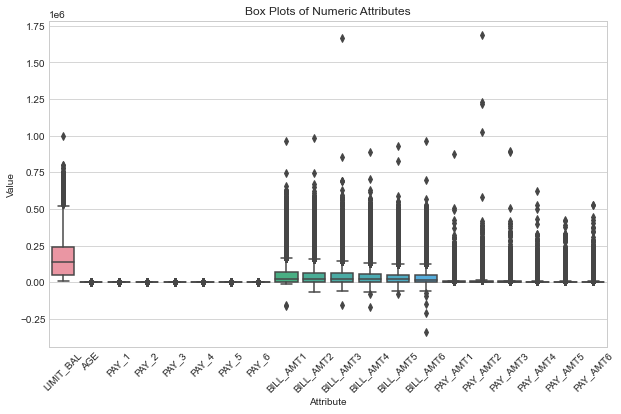

In [62]:
#for var in numeric_attributes:
plt.figure(figsize=(10,6))
sns.boxplot(data= rawdata[numeric_attributes])
plt.title('Box Plots of Numeric Attributes')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

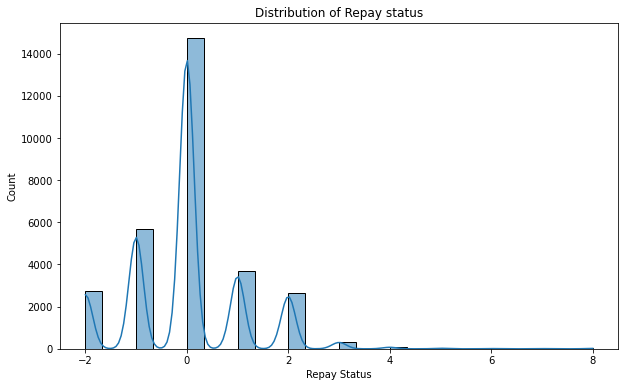

In [29]:
# plot distribution of variables
librabry(ggplot2)
plt.figure(figsize=(10,6))
sns.histplot(rawdata['PAY_1'], bins=30, kde=True)
plt.xlabel('Repay Status')
plt.ylabel('Count')
plt.title('Distribution of Repay status')
plt.show()

In [ ]:
rawdata.columns

<AxesSubplot:xlabel='EDUCATION'>

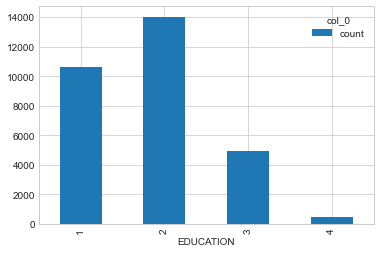

In [55]:
my_tab = pd.crosstab(index=rawdata["EDUCATION"],columns="count")
my_tab.plot.bar()

<AxesSubplot:xlabel='SEX'>

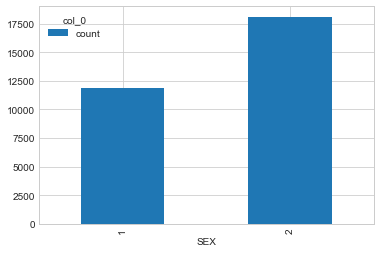

In [56]:
my_tab = pd.crosstab(index=rawdata["SEX"],columns="count")
my_tab.plot.bar()

<AxesSubplot:xlabel='MARRIAGE'>

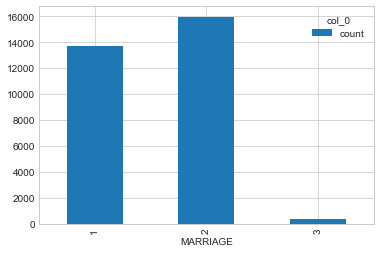

In [57]:
my_tab = pd.crosstab(index=rawdata["MARRIAGE"],columns="count")
my_tab.plot.bar()

In [ ]:
#rawdata['LIMIT_BAL'].describe()
plt.figure(figsize=(10,6))
sns.histplot(rawdata['LIMIT_BAL'], bins=30, kde=True)
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.title('Distribution of Credit Limits')
plt.show()

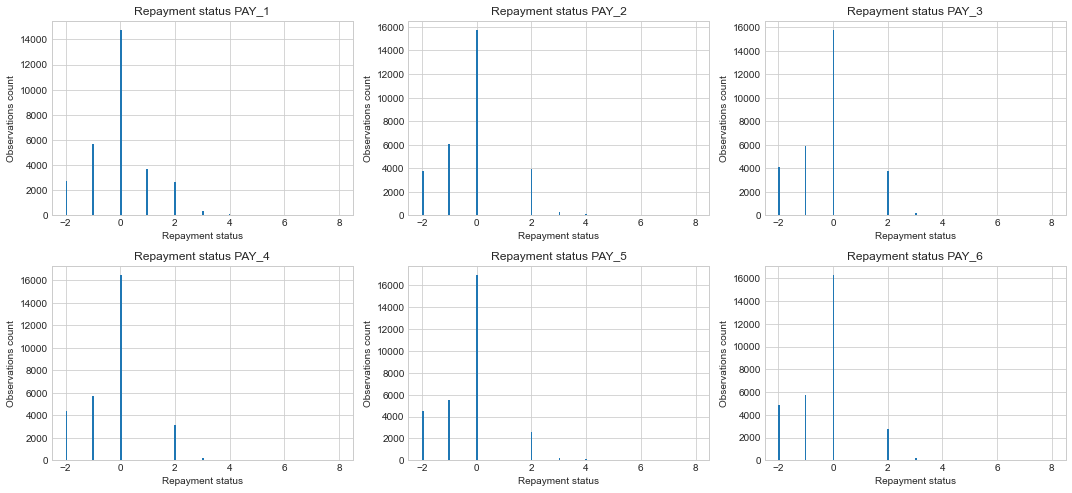

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# List of PAY column names
pay_cols_names = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

# Create a DataFrame with raw data
raw_data = pd.DataFrame({
    "PAY_0": [2, 0, 1, 2, 0, 0],
    # Include other PAY columns
    # ...
})

# Generate bar plots for PAY_0..6 variables
fig, axes = plt.subplots(len(pay_cols_names) // 3 + 1, 3, figsize=(15, 10))
for i, pay_col_name in enumerate(pay_cols_names):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(rawdata[pay_col_name], bins='auto')
    ax.set_title(f"Repayment status {pay_col_name}")
    ax.set_xlabel("Repayment status")
    ax.set_ylabel("Observations count")
    ax.grid(True)

# Remove any empty subplots
for i in range(len(pay_cols_names), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [60]:
# Renaming Male/Female levels for SEX variable
rawdata['SEX'] = rawdata['SEX'].replace({'1': 'Male', '2': 'Female'})

# Print the structure of the SEX variable
print(rawdata['SEX'])



0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: category
Categories (2, int64): [1, 2]


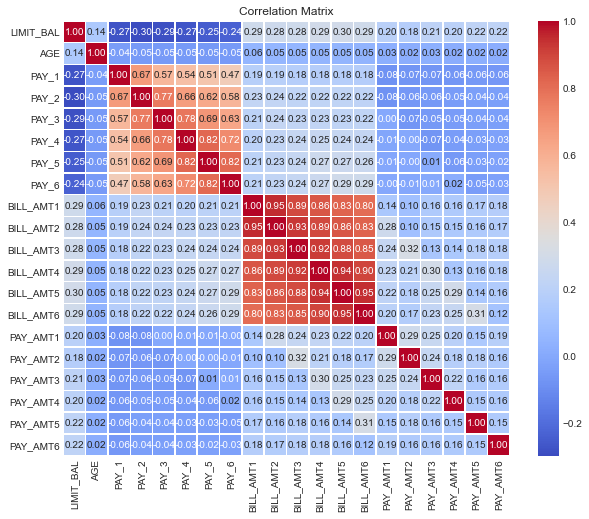

In [69]:
corr_matrix = rawdata[numeric_attributes].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [73]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Assuming fin_data is a pandas DataFrame object
# Remove the target variable if it exists
if 'DEFAULT' in rawdata.columns:
    rawdata = rawdata.drop('DEFAULT', axis=1)

# Apply the near-zero variance test
selector = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
selector.fit(rawdata)

# Get the boolean mask indicating which features have near-zero variance
near_zero_vars = rawdata.columns[~selector.get_support()]

# Print the near-zero variance predictors
print("Near-zero variance predictors:")
print(near_zero_vars)


Near-zero variance predictors:
Index([], dtype='object')
